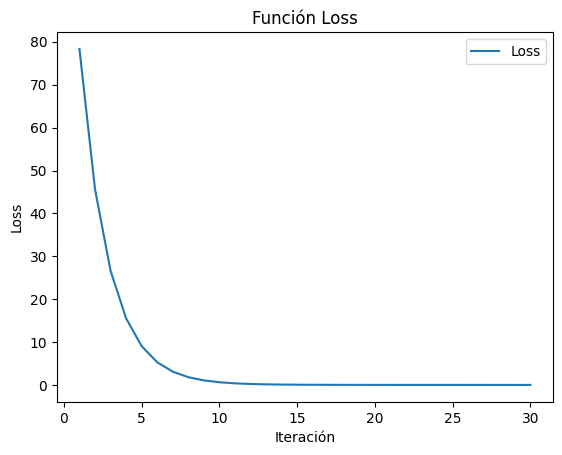

[]

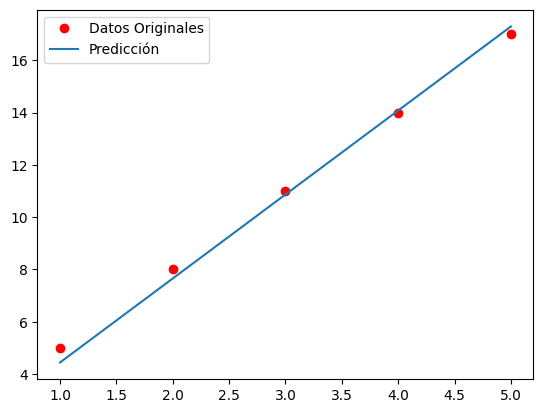

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1],[2],[3],[4],[5]], dtype=np.float32)
Y =np.array([3*x + 2 for x in X], dtype=np.float32)

X_entre = torch.tensor(X, dtype = torch.float32)
Y_entre = torch.tensor(Y, dtype = torch.float32)

modelo = nn.Linear(1,1)

criterio = nn.MSELoss()
optimizer = optim.SGD(modelo.parameters(), lr=0.01)

losses = []
num_epochs = 30
for epoch in range (num_epochs):
    outputs = modelo(X_entre)
    loss = criterio(outputs, Y_entre)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Iteración [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())



plt.plot(range(1, num_epochs + 1), losses, label='Loss')
plt.xlabel('Iteración')
plt.ylabel('Loss')
plt.title('Función Loss')
plt.legend()
plt.show()

predicted = modelo(X_entre).detach().numpy()
plt.plot(X, Y, "ro", label = "Datos Originales")
plt.plot(X, predicted, label = "Predicción")
plt.legend()
plt.plot()        
